In [19]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [20]:
# File to Load (Remember to Change These)
mouse_drug_csv = "data/mouse_drug_data.csv"
clinical_trial_csv = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_csv)
clinical_data = pd.read_csv(clinical_trial_csv)

In [21]:
# Combine the data into a single dataset
combined_df = pd.merge(clinical_data, mouse_data, on="Mouse ID", how="outer")

In [22]:
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [23]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_mean_cols = combined_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Convert to DataFrame
tumor_mean_df = tumor_mean_cols.groupby(["Drug", "Timepoint"]).mean()
tumor_mean_df = tumor_mean_df.reset_index()

# Preview DataFrame
tumor_mean_df.head(10)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [24]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_std_error_cols = combined_df[["Drug", "Timepoint", "Tumor Volume (mm3)"]]

# Convert to DataFrame
tumor_std_error_df = tumor_std_error_cols.groupby(["Drug", "Timepoint"]).sem().reset_index()

# Preview DataFrame
tumor_std_error_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [25]:
# Minor Data Munging to Re-Format the Data Frames
tumor_mean_pivot_df = tumor_mean_df.reset_index().pivot("Timepoint", "Drug", "Tumor Volume (mm3)")

# Preview that Reformatting worked
tumor_mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


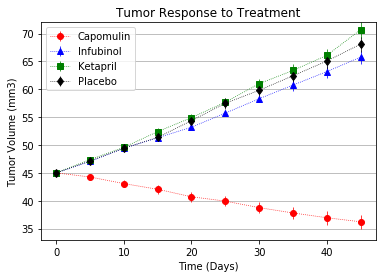

In [26]:
# Generate the Plot (with Error Bars)
x_axis = tumor_mean_pivot_df.index

# standard error (yerr=)
sem_tumor_mean = tumor_std_error_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

# plot the lines
plt.errorbar(x_axis, tumor_mean_pivot_df["Capomulin"], yerr=sem_tumor_mean["Capomulin"], 
             marker="o", color="r", linestyle=":", linewidth=.75, label="Capomulin")
plt.errorbar(x_axis, tumor_mean_pivot_df["Infubinol"], yerr=sem_tumor_mean["Infubinol"], 
             marker="^", color="b", linestyle=":", linewidth=.75, label="Infubinol")
plt.errorbar(x_axis, tumor_mean_pivot_df["Ketapril"], yerr=sem_tumor_mean["Ketapril"], 
             marker="s", color="g", linestyle=":", linewidth=.75, label="Ketapril")
plt.errorbar(x_axis, tumor_mean_pivot_df["Placebo"], yerr=sem_tumor_mean["Placebo"], 
             marker="d", color="black", linestyle=":", linewidth=.75, label="Placebo")

# format
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.ylim(33,72)
plt.grid(axis="y")
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/tumor_response.png")

# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [27]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_mean_cols = combined_df[["Drug", "Timepoint", "Metastatic Sites"]]

# Convert to DataFrame
meta_mean_df = meta_mean_cols.groupby(["Drug", "Timepoint"]).mean()

# Preview DataFrame
meta_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [28]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_std_err_cols = combined_df[["Drug", "Timepoint", "Metastatic Sites"]]

# Convert to DataFrame
meta_std_err_df = meta_std_err_cols.groupby(["Drug", "Timepoint"]).sem()

# Preview DataFrame
meta_std_err_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [29]:
# Minor Data Munging to Re-Format the Data Frames
meta_mean_pivot_df = meta_mean_df.reset_index().pivot("Timepoint", "Drug", "Metastatic Sites")

# Preview that Reformatting worked
meta_mean_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


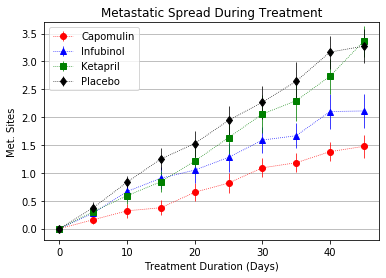

In [30]:
# Generate the Plot (with Error Bars)
sem_meta = meta_std_err_df.reset_index().pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]

# plot the lines
plt.errorbar(x_axis, meta_mean_pivot_df["Capomulin"], yerr=sem_meta["Capomulin"], 
             marker="o", color="r", linestyle=":", linewidth=.75, label="Capomulin")
plt.errorbar(x_axis, meta_mean_pivot_df["Infubinol"], yerr=sem_meta["Infubinol"], 
             marker="^", color="b", linestyle=":", linewidth=.75, label="Infubinol")
plt.errorbar(x_axis, meta_mean_pivot_df["Ketapril"], yerr=sem_meta["Ketapril"], 
             marker="s", color="g", linestyle=":", linewidth=.75, label="Ketapril")
plt.errorbar(x_axis, meta_mean_pivot_df["Placebo"], yerr=sem_meta["Placebo"], 
             marker="d", color="black", linestyle=":", linewidth=.75, label="Placebo")

# format
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.ylim(-0.2,3.7)
plt.grid(axis="y")
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/metastasis.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [31]:
# Store the Count of Mice Grouped by Drug and Timepoint (We can pass any metric)
mouse_count_cols = combined_df[["Drug", "Timepoint", "Mouse ID"]]

# Convert to DataFrame
mouse_count_df = mouse_count_cols.groupby(["Drug", "Timepoint"]).count()

# Rename "Mouse ID" to "Mouse Count"
mouse_count_df = mouse_count_df.rename(columns={"Mouse ID":"Mouse Count"}).reset_index()

# Preview DataFrame
mouse_count_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [32]:
# Minor Data Munging to Re-Format the Data Frames
#mouse_count_pivot_df = mouse_count_df.reset_index().pivot(index="Timepoint", columns="Drug")
mouse_count_pivot_df = mouse_count_df.reset_index().pivot("Timepoint", "Drug", "Mouse Count")
# Preview the Data Frame
mouse_count_pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


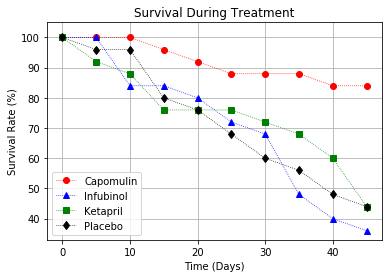

In [33]:
# Generate the Plot (Accounting for percentages)
mouse_survival_df = mouse_count_pivot_df.loc[:]/mouse_count_pivot_df.loc[0] * 100

# plot the lines
plt.plot(x_axis, (mouse_survival_df["Capomulin"]), marker="o", color="r", linestyle=":", linewidth=.75, label="Capomulin")
plt.plot(x_axis, (mouse_survival_df["Infubinol"]), marker="^", color="b", linestyle=":", linewidth=.75, label="Infubinol")
plt.plot(x_axis, (mouse_survival_df["Ketapril"]), marker="s", color="g", linestyle=":", linewidth=.75, label="Ketapril")
plt.plot(x_axis, (mouse_survival_df["Placebo"]), marker="d", color="black", linestyle=":", linewidth=.75, label="Placebo")

# format
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.ylim(33,105)
plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("../Images/survival_rate.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [34]:
# Calculate the percent changes for each drug
perc_change = (tumor_mean_pivot_df.pct_change(periods=len(tumor_mean_pivot_df)-1) * 100).sum()
# Display the data to confirm
perc_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

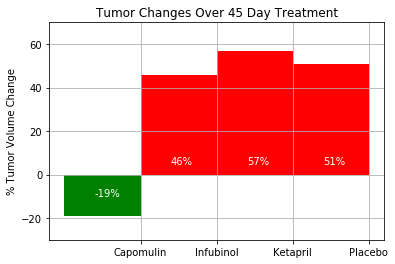

In [35]:
# Store all Relevant Percent Changes into a Tuple
drug_tuple = (int(perc_change["Capomulin"]), int(perc_change["Infubinol"]), 
              int(perc_change["Ketapril"]), int(perc_change["Placebo"]))
x_tuple = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# Splice the data between passing and failing drugs
colors = ["g" if drug < 0 else "r" for drug in drug_tuple]

# Orient widths. Add labels, tick marks, etc. 
plt.bar(x_tuple, drug_tuple, width=-1, color=colors, align="edge")

plt.title("Tumor Changes Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.ylim(-30,70)
plt.yticks(np.arange(-20,70, step=20))
plt.grid()

# Use functions to label the percentages of changes
def bar_label(x, y, text):
    plt.text(x, y, str(text)+"%", color="w")
        
# Call functions to implement the function calls
bar_label(-.6, -10, drug_tuple[0])
bar_label(.4, 5, drug_tuple[1])
bar_label(1.4, 5, drug_tuple[2])
bar_label(2.4, 5, drug_tuple[3])    

# Save the Figure
plt.savefig("../Images/tumor_changes_over_45_days")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [36]:
# CONCLUSIONS: 3 OBSERVATIONS

# 1. The mice treated with Capomulin had the most positive outcomes with a survival rate of 84%
#    and a metastatic spread of less than 1.5 at the end of the 45-day trial.

# 2. The mice treated with Ketapril and Infubinol experienced almost the same increase in tumor volume
#    as the untreated mice (those given placebo).

# 3. Despite the similar increase in tumor volume experienced by mice treated with Ketapril, Infubinol 
#    and placebo, only Ketapril test subjects experienced a similar metastasis to those treated with 
#    placebo. Mice treated with Infubinol had almost half the metastatic spread as those treated with 
#    Ketapril or placebo, with an outcome closer to the mice treated with the drug associated with the 
#    most positive outcomes, Capomulin.